### Project: Injury Prediction

Student: Ester Fiorillo

Running is one of the most practiced physical activities in the world, with millions of practitioners in all its variations (trails, street running, marathons, etc). Also, An absurd amount of injuries in this sport is reported annually, which often make an athlete go through long recovery periods or even abandon the practice. Little is known about risk factors for running injuries, but many studies point to clues such as age, previous sporting activity, running on a concrete surface, marathon participation, weekly running distance (30 to 39 miles) and the use of suitable running shoes.

In this sense, this study was carried out with the aim of increasing knowledge about these factors, using machine learning techniques to train an injury prediction model in high-performance running athletes. For this, an attempt was made to create a tool that enables athletes and other sports professionals to think better about their training and competition practices in order to avoid injuries.

To train this machine learning model, we used a running dataset found in Kaggle at the following link:

https://www.kaggle.com/datasets/shashwatwork/injury-prediction-for-competitive-runners

These data represent the grouping of athletes' training data over a period of one week and also include whether that week the athlete was injured or not, which is the variable that the model will predict. This grouping of data in a period of one week was chosen because an injury usually comes from a set of trainings in which there was probably some load increase or that the rest was not done properly. Therefore, it is necessary to evaluate a set of training sessions and not an isolated event.

1) Import necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2) Import data from Kaggle CSV:

In [2]:
data = pd.read_csv('week_approach_maskedID_timeseries.csv')
data.head()

,nr. sessions,nr. rest days,total kms,max km one day,total km Z3-Z4-Z5-T1-T2,"nr. tough sessions (effort in Z5, T1 or T2)",nr. days with interval session,total km Z3-4,max km Z3-4 one day,total km Z5-T1-T2,...,max training success.2,avg recovery.2,min recovery.2,max recovery.2,Athlete ID,injury,rel total kms week 0_1,rel total kms week 0_2,rel total kms week 1_2,Date
0,5.0,2.0,22.2,16.4,11.8,1.0,2.0,10.0,10.0,0.6,...,0.0,0.18,0.16,0.20,0,0,0.718447,1.378882,1.919255,0
1,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.18,0.16,0.20,0,0,0.683544,1.018868,1.490566,1
2,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.17,0.16,0.18,0,0,0.683544,1.018868,1.490566,2
3,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.18,0.16,0.18,0,0,0.683544,1.018868,1.490566,3
4,6.0,1.0,39.2,17.6,18.9,1.0,3.0,17.2,10.0,0.5,...,0.0,0.17,0.16,0.18,0,0,2.202247,1.361111,0.618056,4


### Exploratory data analysis

3) Basic informations about the dataset.

In [3]:
data.columns

Index(['nr. sessions', 'nr. rest days', 'total kms', 'max km one day',
       'total km Z3-Z4-Z5-T1-T2',
       'nr. tough sessions (effort in Z5, T1 or T2)',
       'nr. days with interval session', 'total km Z3-4',
       'max km Z3-4 one day', 'total km Z5-T1-T2', 'max km Z5-T1-T2 one day',
       'total hours alternative training', 'nr. strength trainings',
       'avg exertion', 'min exertion', 'max exertion', 'avg training success',
       'min training success', 'max training success', 'avg recovery',
       'min recovery', 'max recovery', 'nr. sessions.1', 'nr. rest days.1',
       'total kms.1', 'max km one day.1', 'total km Z3-Z4-Z5-T1-T2.1',
       'nr. tough sessions (effort in Z5, T1 or T2).1',
       'nr. days with interval session.1', 'total km Z3-4.1',
       'max km Z3-4 one day.1', 'total km Z5-T1-T2.1',
       'max km Z5-T1-T2 one day.1', 'total hours alternative training.1',
       'nr. strength trainings.1', 'avg exertion.1', 'min exertion.1',
       'max exertion.

In [4]:
data.describe()

,nr. sessions,nr. rest days,total kms,max km one day,total km Z3-Z4-Z5-T1-T2,"nr. tough sessions (effort in Z5, T1 or T2)",nr. days with interval session,total km Z3-4,max km Z3-4 one day,total km Z5-T1-T2,...,max training success.2,avg recovery.2,min recovery.2,max recovery.2,Athlete ID,injury,rel total kms week 0_1,rel total kms week 0_2,rel total kms week 1_2,Date
count,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,...,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,4.279800e+04,4.279800e+04,4.279800e+04,42798.000000
mean,5.809337,1.874667,49.543911,14.009255,9.433621,0.930184,1.672531,4.859398,3.456888,4.063970,...,0.525709,0.255089,0.184927,0.343522,34.538249,0.013435,4.408628e+05,9.014685e+05,4.803623e+05,1227.733422
std,2.484234,1.853287,36.715017,9.071678,8.887120,1.040631,1.263528,6.984670,4.577423,5.645305,...,0.390604,0.153214,0.127996,0.219536,19.020826,0.115130,4.328234e+06,6.945503e+06,4.656806e+06,806.495152
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,5.000000,1.000000,22.800000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.150000,0.110000,0.170000,20.000000,0.000000,6.955245e-01,6.723968e-01,6.923077e-01,437.000000
50%,6.000000,1.000000,44.800000,13.400000,8.000000,1.000000,2.000000,0.000000,0.000000,1.500000,...,0.730000,0.220000,0.160000,0.310000,34.000000,0.000000,9.891862e-01,1.001431e+00,9.897523e-01,1254.000000
75%,7.000000,3.000000,70.100000,18.300000,14.600000,2.000000,3.000000,8.000000,6.300000,6.300000,...,0.840000,0.360000,0.240000,0.520000,50.000000,0.000000,1.320515e+00,1.422171e+00,1.327586e+00,1913.000000
max,14.000000,7.000000,242.000000,131.000000,100.000000,6.000000,7.000000,79.800000,75.000000,80.000000,...,1.000000,0.900000,0.900000,1.000000,73.000000,1.000000,2.096000e+08,2.176000e+08,2.096000e+08,2673.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42798 entries, 0 to 42797
Data columns (total 72 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   nr. sessions                                   42798 non-null  float64
 1   nr. rest days                                  42798 non-null  float64
 2   total kms                                      42798 non-null  float64
 3   max km one day                                 42798 non-null  float64
 4   total km Z3-Z4-Z5-T1-T2                        42798 non-null  float64
 5   nr. tough sessions (effort in Z5, T1 or T2)    42798 non-null  float64
 6   nr. days with interval session                 42798 non-null  float64
 7   total km Z3-4                                  42798 non-null  float64
 8   max km Z3-4 one day                            42798 non-null  float64
 9   total km Z5-T1-T2                              427

4) Count the occurrence of injured or non-injured athletes in the dataset. This indicates that there is a large imbalance of classes in the dataset, with 525 occurrences of injuries against 42223 occurrences of non-injuries.

<BarContainer object of 2 artists>

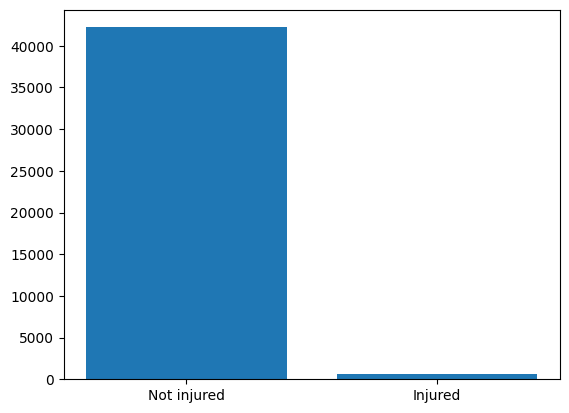

In [6]:
plt.bar(['Not injured', 'Injured'], data["injury"].value_counts())

In [7]:
injury = data[data['injury'] == 1]
not_injury = data[data['injury'] == 0]
print(injury.shape)
print(not_injury.shape)

(575, 72)
(42223, 72)


5) In the next cells, an analysis was performed comparing the values of some features for the injured group and for the non-injured group. The purpose of this is to see how each feature can be useful in the characterization of a lesion. We can see by the plots that the feature values can be very different comparing the two groups, especially in 'n of rest days',  'max exertion' and 'nr. strength trainings' features.

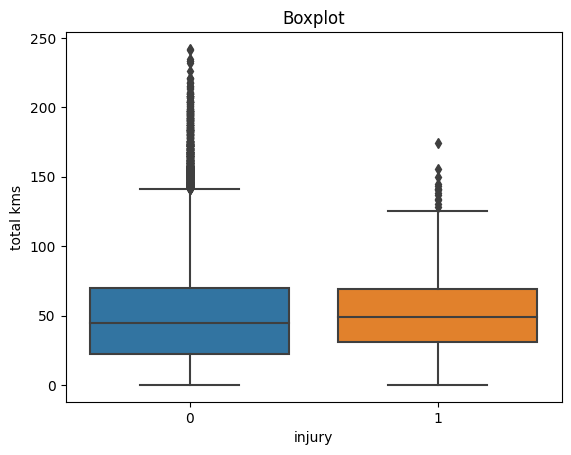

In [8]:
sns.boxplot(data=data, x='injury', y='total kms');
plt.title("Boxplot");

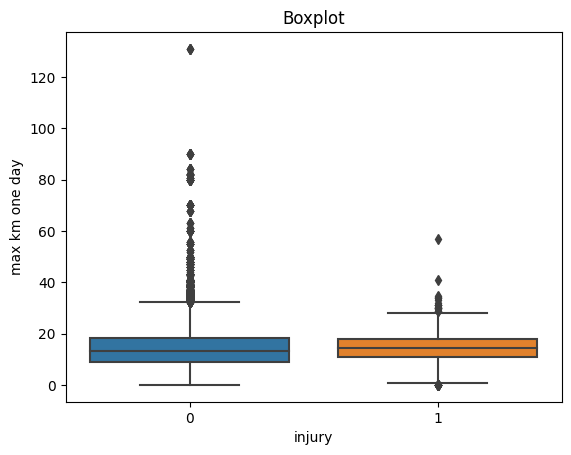

In [9]:
sns.boxplot(data=data, x='injury', y='max km one day');
plt.title("Boxplot");

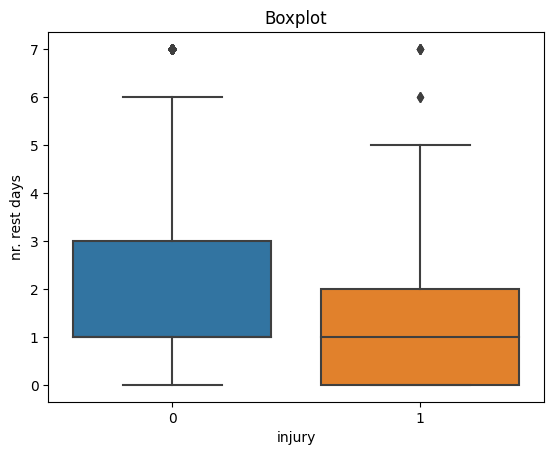

In [10]:
sns.boxplot(data=data, x='injury', y='nr. rest days');
plt.title("Boxplot");

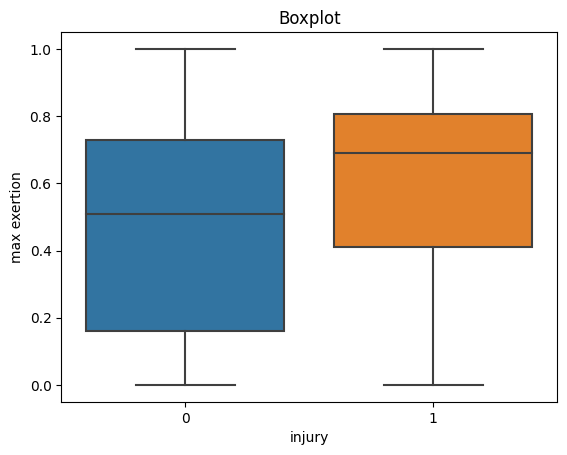

In [11]:
sns.boxplot(data=data, x='injury', y='max exertion');
plt.title("Boxplot");

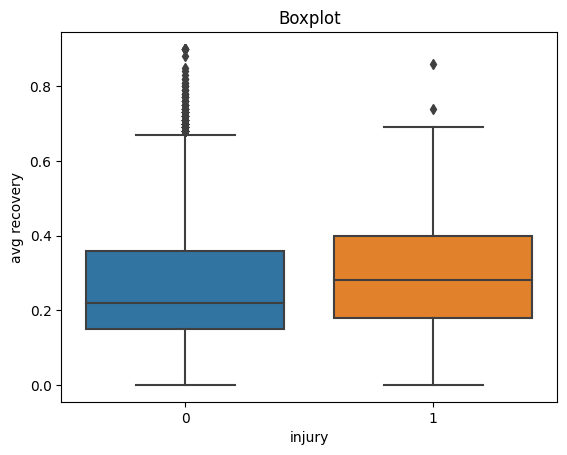

In [12]:
sns.boxplot(data=data, x='injury', y='avg recovery');
plt.title("Boxplot");

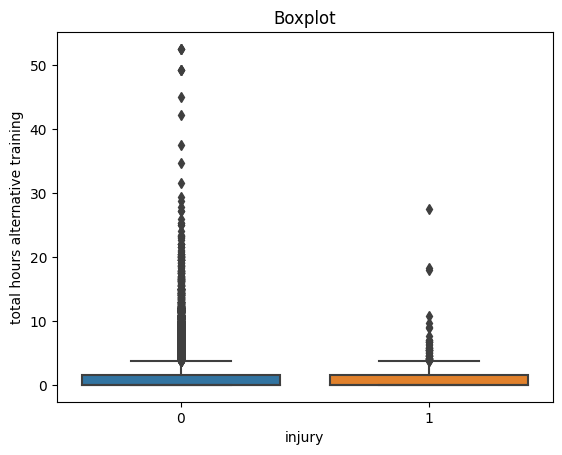

In [13]:
sns.boxplot(data=data, x='injury', y='total hours alternative training');
plt.title("Boxplot");

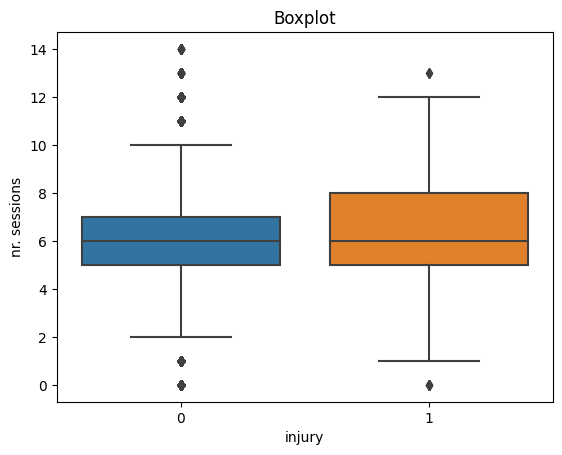

In [14]:
sns.boxplot(data=data, x='injury', y='nr. sessions');
plt.title("Boxplot");

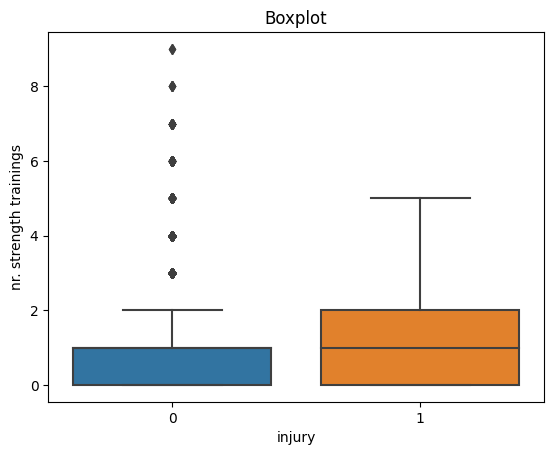

In [15]:
sns.boxplot(data=data, x='injury', y='nr. strength trainings');
plt.title("Boxplot");

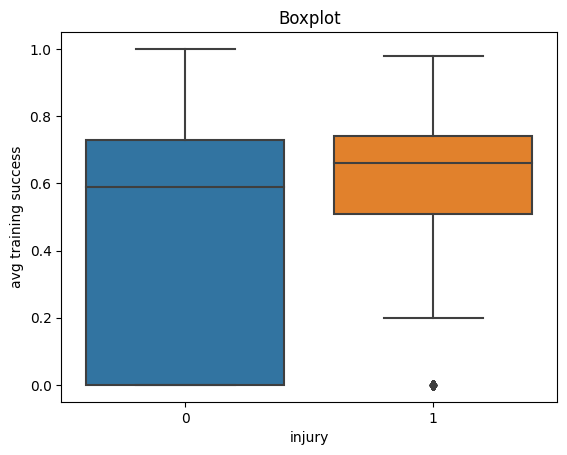

In [16]:
sns.boxplot(data=data, x='injury', y='avg training success');
plt.title("Boxplot");

6) Data correlation: Some features were selected based on empirical analysis and a correlation matrix was plotted to see how the features are related.

In [17]:
data2 = data[['injury', 'nr. sessions', 'total hours alternative training', 'avg recovery',
              'max exertion', 'nr. rest days', 'max km one day', 'total kms',
              'nr. strength trainings', 'avg training success']]

<Axes: >

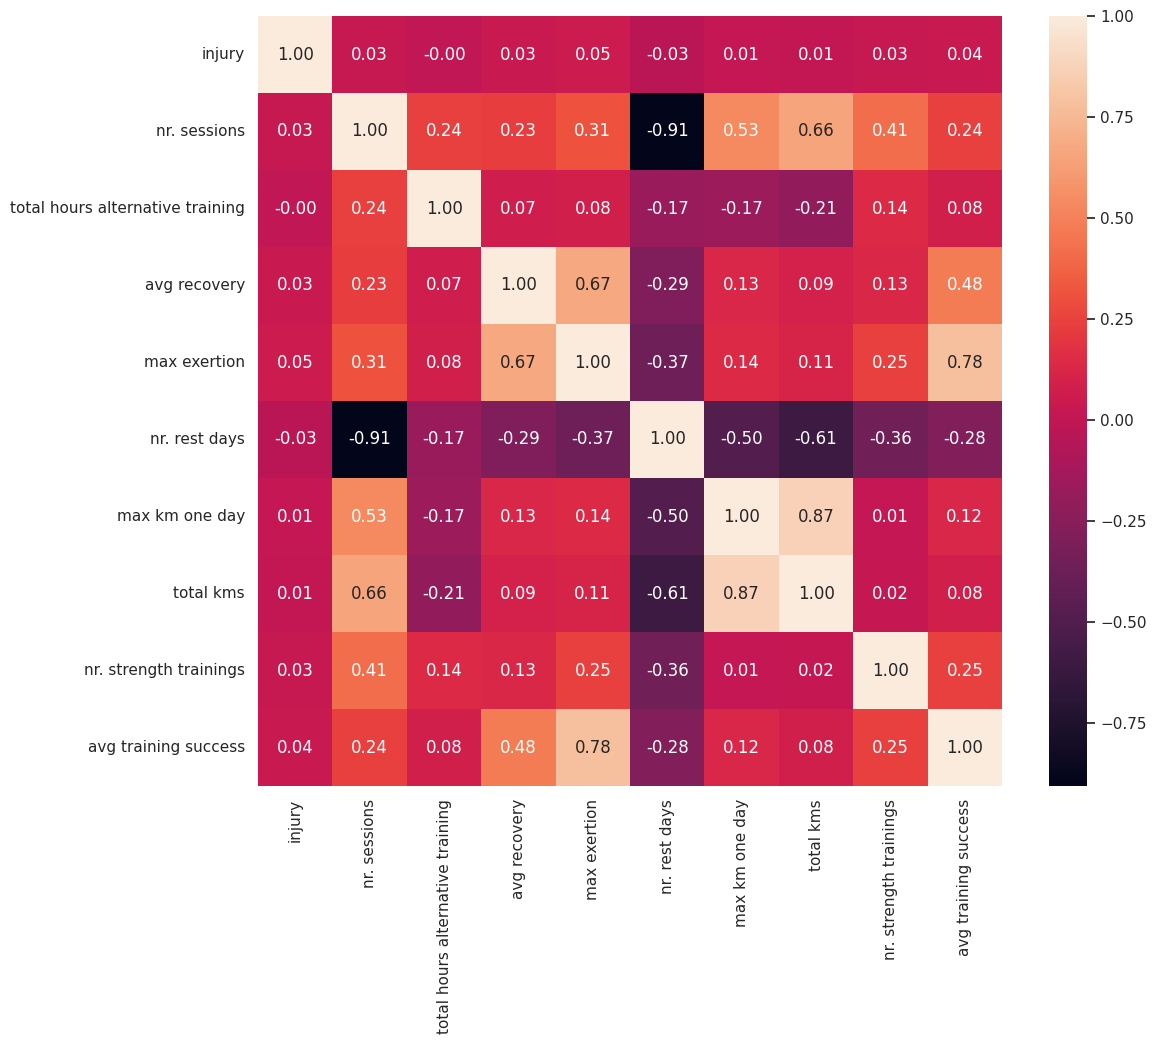

In [18]:
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(data2.corr(), annot=True, fmt=".2f")

7) Check for missing values. We can see that the dataser has no missing values, so processing this is not necessary.

In [19]:
data['injury'].isna().sum()

0

In [20]:
data.isna().sum()

nr. sessions               0
nr. rest days              0
total kms                  0
max km one day             0
total km Z3-Z4-Z5-T1-T2    0
                          ..
injury                     0
rel total kms week 0_1     0
rel total kms week 0_2     0
rel total kms week 1_2     0
Date                       0
Length: 72, dtype: int64

Dataset has no nan values.

8) Remove Athlete ID column and Date column from the dataset to start modeling:

In [21]:
data = data.drop('Athlete ID', axis = 1)
data = data.drop('Date', axis = 1)

### Modeling

1) Function that implements the metrics Confusion Matrix and Accuracy. These metrics were chosen because they are the most used in classification problems, especially in this case that we have an unbalanced dataset and it is important to check how many samples are being classified as false positive and false negative.

In [22]:
def display_results(cv, y_test, y_pred):
    '''
    Prints the metrics calculated from a machine learning model, such as the best parameters used to train the model.

    Parameters:
        cv (model): Machine Learning model.
        y_test: labels of the test set.
        y_pred: predictions returned by the model.
    '''
    labels = [0, 1]
    confusion_mat = confusion_matrix(y_test, y_pred, labels=labels)
    accuracy = (y_pred == y_test).mean()

    print("Labels:", labels)
    print("Confusion Matrix:\n", confusion_mat)
    print("Accuracy:", accuracy)
    print("\nBest Parameters:", cv.best_params_)

2) Separate features and labels in X and Y data, and split dataset into train and test.

In [23]:
def split_dataset(data):
  '''
  Returns the data divided into train and test.

  Parameters:
      data (pd.DataFrame): Running dataset.

  Returns:
      X_train (pd.DataFrame): Table with train features.
      Y_train (pd.Series): Series with train labels.
      X_test (pd.DataFrame): Table with test features.
      Y_test (pd.Series): Series with test labels.
  '''
  X = data.drop('injury', axis = 1)
  Y = data['injury']
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, stratify = Y)
  return X_train, X_test, Y_train, Y_test

3) Implements a model without any balancing methods. We can see that the model predicts all samples as non injured, which is the dominant class. This model is useless because it did not learn what diferenciates a lessioned athete and a non lessioned athete. Anyway it was used a data pipeline in order to use a grid search and find the best parameters.

In [24]:
X_train, X_test, Y_train, Y_test = split_dataset(data)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pipeline = Pipeline([
    ('clf', SVC())
])

parameters = {
    'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_train, Y_train)
Y_pred = cv.predict(X_test)
display_results(cv, Y_test, Y_pred)

Labels: [0, 1]
Confusion Matrix:
 [[10556     0]
 [  144     0]]
Accuracy: 0.9865420560747663

Best Parameters: {'clf__kernel': 'linear'}


4) A set of machine learning models associated with the Random Under Sampling balancing technique were tested. These models were SVM, KNN, Random Forest and XGboosting. It was also used a machine learning pipeline in order to use a grid search and find the best parameters.

SVM

In [25]:
X_train, X_test, Y_train, Y_test = split_dataset(data)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
rus = RandomUnderSampler(random_state=0)
X_train, Y_train =rus.fit_resample(X_train,Y_train)

pipeline = Pipeline([
    ('clf', SVC())
])

parameters = {
    'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_train, Y_train)
Y_pred = cv.predict(X_test)
display_results(cv, Y_test, Y_pred)

Labels: [0, 1]
Confusion Matrix:
 [[6238 4318]
 [  53   91]]
Accuracy: 0.5914953271028037

Best Parameters: {'clf__kernel': 'rbf'}


KNN

In [26]:
X_train, X_test, Y_train, Y_test = split_dataset(data)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
rus = RandomUnderSampler(random_state=0)
X_train, Y_train =rus.fit_resample(X_train,Y_train)

pipeline = Pipeline([
    ('clf', KNeighborsClassifier())
])

parameters = {
    'clf__n_neighbors': [2, 3, 4, 5, 6, 10]
}

cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_train, Y_train)
Y_pred = cv.predict(X_test)
display_results(cv, Y_test, Y_pred)

Labels: [0, 1]
Confusion Matrix:
 [[6302 4254]
 [  67   77]]
Accuracy: 0.5961682242990655

Best Parameters: {'clf__n_neighbors': 3}


Random Forest

In [27]:
X_train, X_test, Y_train, Y_test = split_dataset(data)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
rus = RandomUnderSampler(random_state=0)
X_train, Y_train =rus.fit_resample(X_train,Y_train)

pipeline = Pipeline([
    ('clf', RandomForestClassifier())
])

parameters = {
    'clf__n_estimators': [50, 100, 200],
    'clf__min_samples_split': [2, 3, 4]
}

cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_train, Y_train)
Y_pred = cv.predict(X_test)
display_results(cv, Y_test, Y_pred)

Labels: [0, 1]
Confusion Matrix:
 [[6302 4254]
 [  62   82]]
Accuracy: 0.5966355140186916

Best Parameters: {'clf__min_samples_split': 4, 'clf__n_estimators': 200}


GXboosting

In [28]:
X_train, X_test, Y_train, Y_test = split_dataset(data)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
rus = RandomUnderSampler(random_state=0)
X_train, Y_train =rus.fit_resample(X_train,Y_train)

pipeline = Pipeline([
    ('clf', GradientBoostingClassifier())
])

parameters = {
    'clf__n_estimators': [30, 50, 100, 200],
    'clf__max_depth': [2, 3, 4]
}

cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_train, Y_train)
Y_pred = cv.predict(X_test)
display_results(cv, Y_test, Y_pred)

Labels: [0, 1]
Confusion Matrix:
 [[6197 4359]
 [  61   83]]
Accuracy: 0.5869158878504673

Best Parameters: {'clf__max_depth': 4, 'clf__n_estimators': 30}


6) A set of machine learning models associated with the Over Sampling balancing technique were tested. These models were SVM, KNN, Random Forest and XGboosting. It was also used a machine learning pipeline in order to use a grid search and find the best parameters.

SVM

In [29]:
X_train, X_test, Y_train, Y_test = split_dataset(data)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
rus = SMOTE()
X_train, Y_train =rus.fit_resample(X_train,Y_train)

pipeline = Pipeline([
    ('clf', SVC())
])

parameters = {
    'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_train, Y_train)
Y_pred = cv.predict(X_test)
display_results(cv, Y_test, Y_pred)

Labels: [0, 1]
Confusion Matrix:
 [[10188   368]
 [  127    17]]
Accuracy: 0.9537383177570093

Best Parameters: {'clf__kernel': 'rbf'}


KNN

In [30]:
X_train, X_test, Y_train, Y_test = split_dataset(data)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
rus = SMOTE()
X_train, Y_train =rus.fit_resample(X_train,Y_train)

pipeline = Pipeline([
    ('clf', KNeighborsClassifier())
])

parameters = {
    'clf__n_neighbors': [2, 3, 4, 5, 6, 10]
}

cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_train, Y_train)
Y_pred = cv.predict(X_test)
display_results(cv, Y_test, Y_pred)

Labels: [0, 1]
Confusion Matrix:
 [[10524    32]
 [  121    23]]
Accuracy: 0.9857009345794393

Best Parameters: {'clf__n_neighbors': 2}


Random Forest

In [31]:
X_train, X_test, Y_train, Y_test = split_dataset(data)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
rus = SMOTE()
X_train, Y_train =rus.fit_resample(X_train,Y_train)

pipeline = Pipeline([
    ('clf', RandomForestClassifier())
])

parameters = {
    'clf__n_estimators': [50, 100, 200],
    'clf__min_samples_split': [2, 3, 4]
}

cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_train, Y_train)
Y_pred = cv.predict(X_test)
display_results(cv, Y_test, Y_pred)

Labels: [0, 1]
Confusion Matrix:
 [[10556     0]
 [  144     0]]
Accuracy: 0.9865420560747663

Best Parameters: {'clf__min_samples_split': 3, 'clf__n_estimators': 100}


XGBoosting

In [32]:
X_train, X_test, Y_train, Y_test = split_dataset(data)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
rus = SMOTE()
X_train, Y_train =rus.fit_resample(X_train,Y_train)

pipeline = Pipeline([
    ('clf', GradientBoostingClassifier())
])

parameters = {
    'clf__n_estimators': [30, 50, 100, 200],
    'clf__max_depth': [2, 3, 4]
}

cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_train, Y_train)
Y_pred = cv.predict(X_test)
display_results(cv, Y_test, Y_pred)

Labels: [0, 1]
Confusion Matrix:
 [[10552     4]
 [  144     0]]
Accuracy: 0.9861682242990654

Best Parameters: {'clf__max_depth': 4, 'clf__n_estimators': 200}


7) Choose best model and best balancing method to make feature importance analysis:

In [33]:
X_train, X_test, Y_train, Y_test = split_dataset(data)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
rus = RandomUnderSampler(random_state=0)
X_train, Y_train =rus.fit_resample(X_train,Y_train)

model = RandomForestClassifier(min_samples_split=4, n_estimators=50)

model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

labels = [0, 1]
confusion_mat = confusion_matrix(Y_test, Y_pred, labels=labels)
accuracy = (Y_pred == Y_test).mean()

print("Labels:", labels)
print("Confusion Matrix:\n", confusion_mat)
print("Accuracy:", accuracy)

Labels: [0, 1]
Confusion Matrix:
 [[6502 4054]
 [  57   87]]
Accuracy: 0.6157943925233644


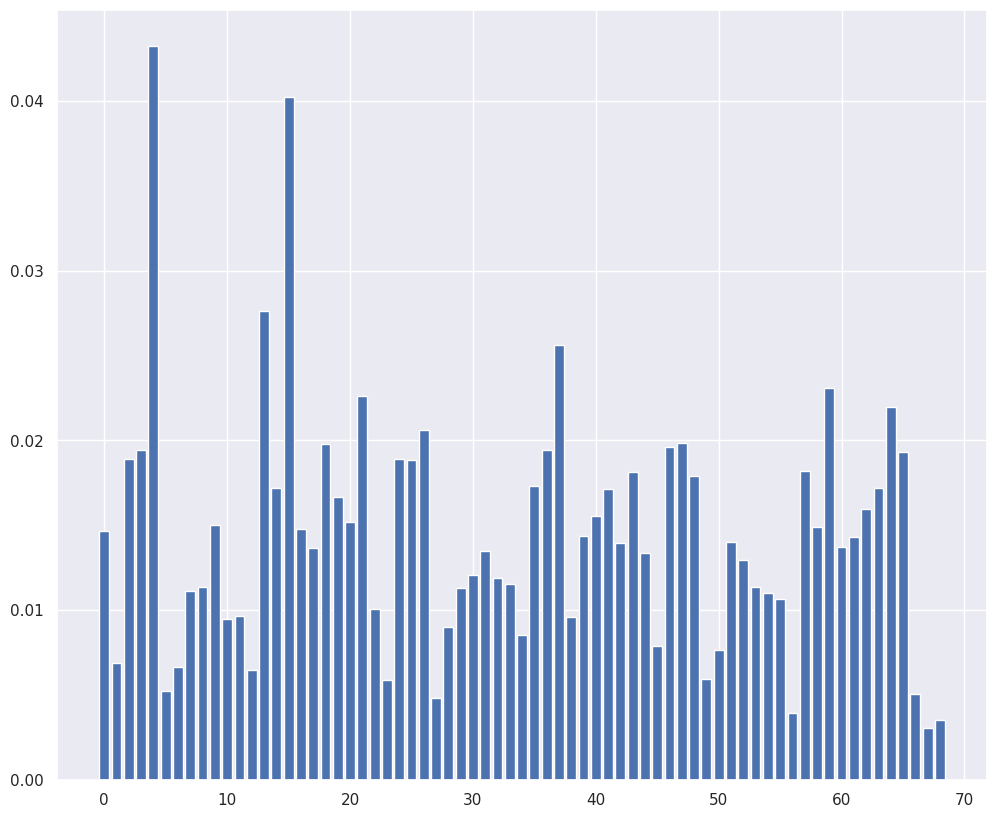

In [34]:
importance = model.feature_importances_
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [35]:
cols = list(data.drop('injury', axis = 1).columns)
imp, col = zip(*sorted(zip(importance, cols)))
print(col[:5])

('rel total kms week 0_2', 'rel total kms week 1_2', 'nr. strength trainings.2', 'nr. tough sessions (effort in Z5, T1 or T2).1', 'rel total kms week 0_1')


### Results and Discussion

The results obtained by the different tested models are shown in the table:

|   | SMOTE  | Under Sampling  |
|---|---|---|
| SVM  |  98% | 59%  |
| KNN  | 98%  | 59%  |
| Randon Forest  | 98%  | 60%  |
| XGBoosting  | 98%  | 58%  |

Using none balancing method and the Over Sampling method, the model clearly overfits, since the accuracy is very high but the model only predicts the majority class. So, adopting balancing methods to overcome this problem, we can see that the best results were found by the Random Forest model using the Random Under Sampling method. Still, it is not a very high accuracy and needs improvement to be used in real life application as injury predictor.

Despite not having extremely satisfactory metrics, this study also served to analyze the importance of the features used to train the model. Looking at the graphs, we can see that the most relevant features were 'rel total kms week 0_2', 'rel total kms week 1_2' and 'nr. strength trainings.2'. This indicates that the most relevant risk factors can be associated with the amount of training load and it can be useful for professionals in the field to assess and discuss which factors are most relevant when deciding on training and competitions for athletes and adopting prevention strategies.


### Conclusion

This study aimed to better understand the risk factors involving the practice of running. For this, several machine learning models were tested in a dataset of data from very unbalanced runners in order to predict injuries. Most samples represented injured athletes and there were few samples from non-injured athletes. Therefore, it was necessary to include balancing techniques in the study. In the end, the best model and the best balancing technique obtained a metric of 60% accuracy, which is not very applicable in a real scenario, but which can offer a useful tool to professionals in the area. This study can also be very useful in the part that analyzes the importance of the features used to train the model, indicating some points that may be potential risks in training and preparing athletes for races.